<a href="https://colab.research.google.com/github/nikhildhuri95/Supermarket_Sales/blob/main/Supermarket1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
data = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [312]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [313]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Data Preprocessing

In [337]:
# Check for duplicates based on Invoice ID
duplicates = data.duplicated(subset=['Invoice ID'])

# Print the number of duplicates
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [314]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Identify rows with date format issues
date_errors = data.loc[data['Date'].isnull(), 'Date']

# Print the rows with date format issues
print(date_errors)


Series([], Name: Date, dtype: datetime64[ns])


In [315]:
data['Date'].head

<bound method NDFrame.head of 0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]>

In [316]:
data = data.sort_values(by=['Date', 'Time'])

In [317]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,4.761905,21.783,6.9
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,11:36,Credit card,846.30,4.761905,42.315,9.0
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40,Ewallet,175.32,4.761905,8.766,5.0
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7


In [318]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
671,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,16:34,Cash,186.80,4.761905,9.340,5.5
474,676-39-6028,A,Yangon,Member,Female,Electronic accessories,64.44,5,16.110,338.310,2019-03-30,17:04,Cash,322.20,4.761905,16.110,6.6
473,731-59-7531,B,Mandalay,Member,Male,Health and beauty,72.57,8,29.028,609.588,2019-03-30,17:58,Cash,580.56,4.761905,29.028,4.6
643,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.008,609.168,2019-03-30,19:26,Credit card,580.16,4.761905,29.008,4.0
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7


#Data Exploration

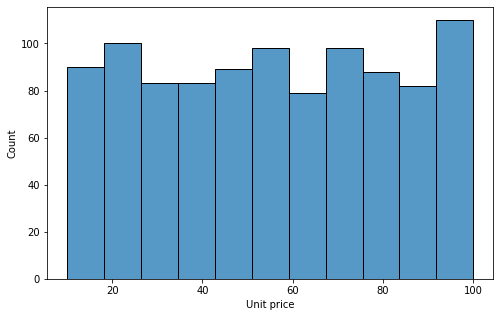

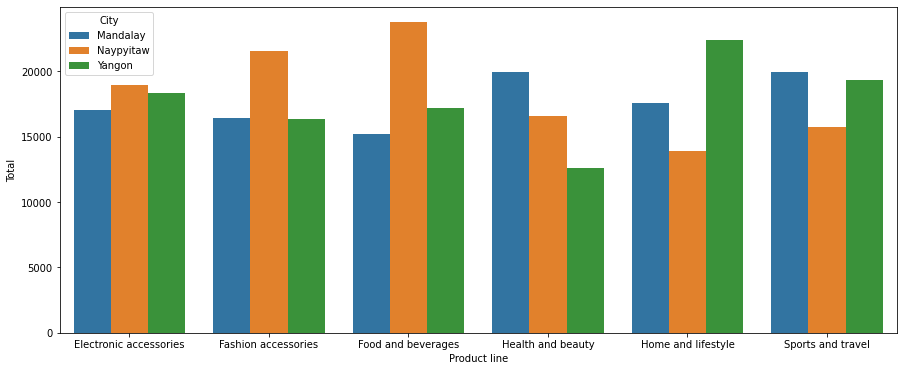

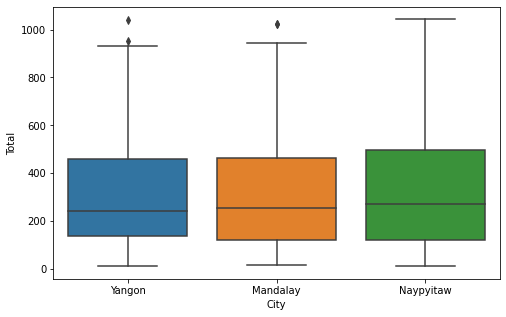

In [319]:
#create a histogram of the "Unit price" 
fig = plt.figure(figsize=(8,5))
sns.histplot(data['Unit price'])
plt.show()

# Calculate the total sales for each product line in each city
sales_by_city_product_line = data.groupby(["City", "Product line"])["Total"].sum().reset_index()

"""The reset_index() method is applied to the result of the groupby() operation, which generates a new DataFrame 
with a multi-level index based on the grouping columns ("City" and "Product line"). The original DataFrame data remains unchanged. 
The new DataFrame with the total sales for each product line in each city is stored in the variable sales_by_city_product_line."""

# Create a bar plot of the total sales for each product line in each city
plt.figure(figsize=(15, 6))
sns.barplot(data=sales_by_city_product_line, x='Product line', y='Total', hue='City')
plt.show()

# Create a bax plot of the average bill value for each city
fig = plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='City', y='Total')
plt.show()


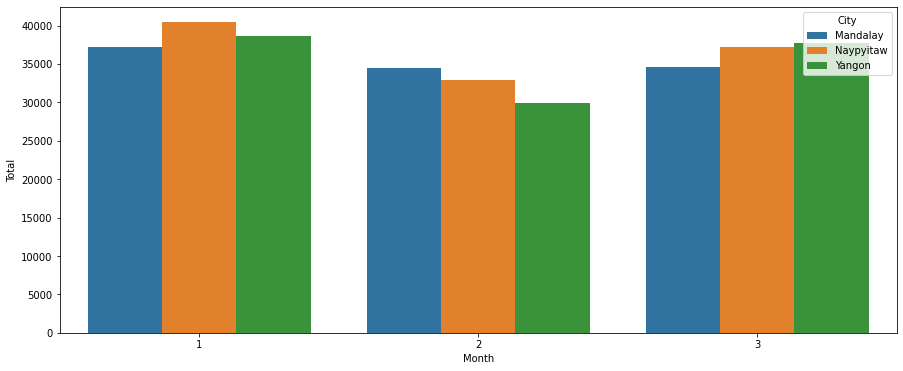

In [320]:
#Creating new column Month
data['Month'] = data['Date'].dt.month

# Calculate the total sales for each product line in each city
sales_by_city_month = data.groupby(["City", "Month"])["Total"].sum().reset_index()

# Create a bar plot of the total sales for each Month in each city
plt.figure(figsize=(15, 6))
sns.barplot(data=sales_by_city_month, x='Month', y='Total', hue='City')
plt.show()

#Data Cleaning

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 963
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-

In [322]:
regression_data = data[['City', 'Branch', 'Product line', 'Total', 'Date']]
regression_data.head

<bound method NDFrame.head of           City Branch            Product line    Total       Date
17      Yangon      A       Sports and travel  457.443 2019-01-01
970   Mandalay      B      Food and beverages  888.615 2019-01-01
839  Naypyitaw      C       Sports and travel  184.086 2019-01-01
523  Naypyitaw      C       Health and beauty  132.027 2019-01-01
567     Yangon      A     Fashion accessories  621.243 2019-01-01
..         ...    ...                     ...      ...        ...
671   Mandalay      B      Food and beverages  196.140 2019-03-30
474     Yangon      A  Electronic accessories  338.310 2019-03-30
473   Mandalay      B       Health and beauty  609.588 2019-03-30
643  Naypyitaw      C      Food and beverages  609.168 2019-03-30
963  Naypyitaw      C  Electronic accessories  304.983 2019-03-30

[1000 rows x 5 columns]>

In [323]:
time_series_data = data[['Date', 'Total']]
time_series_data.head

<bound method NDFrame.head of           Date    Total
17  2019-01-01  457.443
970 2019-01-01  888.615
839 2019-01-01  184.086
523 2019-01-01  132.027
567 2019-01-01  621.243
..         ...      ...
671 2019-03-30  196.140
474 2019-03-30  338.310
473 2019-03-30  609.588
643 2019-03-30  609.168
963 2019-03-30  304.983

[1000 rows x 2 columns]>

#Regression Analysis

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [325]:
# Sort the dataframe by date
regression_data = regression_data.sort_values('Date')

# Set Date column as index
regression_data.set_index('Date', inplace=True)

# Create dummy variables for categorical features
regression_data = pd.get_dummies(regression_data)

In [326]:
# Split the data into training and test sets
X = regression_data.drop('Total', axis=1)
y = regression_data['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [327]:
# param grid is dictionary 
# key --> name of parameter to be tuned
# value --> list of values which you want to check 

# Define the parameter grid for lasso
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]}
lasso = Lasso()
# Perform grid search
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Print the best hyperparameters
print('Best parameters for lasso:', grid_search_lasso.best_params_)

Best parameters for lasso: {'alpha': 10}


In [328]:
# Define the parameter grid for Ridge
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10, 50, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
# Perform grid search
grid_search_Ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_Ridge.fit(X_train, y_train)

# Print the best hyperparameters
print('Best parameters Ridge:', grid_search_Ridge.best_params_)


Best parameters Ridge: {'alpha': 100, 'solver': 'sparse_cg'}


In [329]:
# Define the parameter grid for XGBoost
param_grid_xg = {'n_estimators' : [ 200,300,500],'max_depth' :[ 4,5,6],'criterion' : ['friedman_mse','squared_error']}
gscv_xg =GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid_xg, cv=2, verbose=2.5)
gscv_xg.fit(X_train,y_train)
# Print the best hyperparameters
print('Best parameters for XGBoost :', gscv_xg.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END criterion=friedman_mse, max_depth=4, n_estimators=200;, score=-0.010 total time=   0.2s
[CV 2/2] END criterion=friedman_mse, max_depth=4, n_estimators=200;, score=-0.027 total time=   0.2s
[CV 1/2] END criterion=friedman_mse, max_depth=4, n_estimators=300;, score=-0.010 total time=   0.3s
[CV 2/2] END criterion=friedman_mse, max_depth=4, n_estimators=300;, score=-0.027 total time=   0.3s
[CV 1/2] END criterion=friedman_mse, max_depth=4, n_estimators=500;, score=-0.010 total time=   0.4s
[CV 2/2] END criterion=friedman_mse, max_depth=4, n_estimators=500;, score=-0.027 total time=   0.3s
[CV 1/2] END criterion=friedman_mse, max_depth=5, n_estimators=200;, score=-0.010 total time=   0.1s
[CV 2/2] END criterion=friedman_mse, max_depth=5, n_estimators=200;, score=-0.027 total time=   0.1s
[CV 1/2] END criterion=friedman_mse, max_depth=5, n_estimators=300;, score=-0.010 total time=   0.2s
[CV 2/2] END criterion=friedma

In [330]:
# Lasso Regression
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error: ", mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R-Squared value: ", r2_lasso)

# Ridge Regression
ridge = Ridge(alpha=100,solver='saga')
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R-Squared value: ", r2_ridge)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_Random_Forest = rf.predict(X_test)
mse_Random_Forest = mean_squared_error(y_test, y_pred_Random_Forest)
print("Random Forest Regression Mean Squared Error:", mse_Random_Forest)
r2_Random_Forest = r2_score(y_test, y_pred_Random_Forest)
print("Random Forest Regression R-Squared value: ", r2_Random_Forest)

#create XGBoost Regressor
gbr=GradientBoostingRegressor(criterion='friedman_mse',n_estimators=200,max_depth=4, random_state=91)
gbr.fit(X_train , y_train)
y_pred_xg = gbr.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print("XGBoost Regression Mean Squared Error:", mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)
print("XGBoost Regression R-Squared value: ", r2_xg)

Lasso Regression Mean Squared Error:  58336.4592249768
Lasso Regression R-Squared value:  -0.0015855066848109445
Ridge Regression Mean Squared Error: 58367.95545478529
Ridge Regression R-Squared value:  -0.002126269146408788
Random Forest Regression Mean Squared Error: 59392.619244781585
Random Forest Regression R-Squared value:  -0.01971884186884787
XGBoost Regression Mean Squared Error: 59451.2176442921
XGBoost Regression R-Squared value:  -0.020724924659


Based on the results of the regression analysis, **Lasso and Ridge** regression models **performed slightly better** than Random Forest and XGBoost. However, the performance of **all the models was not satisfactory** as the mean squared error values were high and the R-squared values were negative, indicating poor fit.

Considering the results, it can be concluded that the **available data may not be sufficient** to accurately predict sales using regression analysis. **With more data**, **the code can be used** to train models on larger datasets for **better performance**.

It is also worth mentioning that despite the poor performance of the models, **Lasso and Ridge regression may be better suited** for this type of data and could be worth exploring further with more data, because Lasso and Ridge regression are designed to handle high-dimensional data, which means they can effectively handle situations where there are **many features** (such as in this case with several columns) **compared to the number of observations.** With more data, the models can have more information to work with and may perform better. Therefore, it could be worth exploring Lasso and Ridge regression further with more data.

Additionally, as mentioned, **time series analysis** using **fbprophet** could be another approach to predicting sales with this dataset.

# Time Series

The choice between ARIMA and SARIMA depends on the characteristics of the time series data, such as trend, seasonality, and level of stationarity. If the data has seasonal patterns, SARIMA is a better choice. If the data has **no clear seasonality, ARIMA is a better choice.**

In [331]:

from statsmodels.tsa.arima.model import ARIMA

In [332]:
# Sort the dataframe by date
time_series_data = time_series_data.sort_values(by='Date')

# Set the date column as the index
time_series_data.set_index('Date')

# Split the data into train and test sets
train_data = time_series_data.iloc[:800]
test_data = time_series_data.iloc[800:]
#train_data contains the first 800 rows of the time_series_data dataframe 
#test_data contains the rows of the time_series_data dataframe, starting from the 801st row till the end of the dataframe.


# Assuming 'df' is the name of the DataFrame variable
print(time_series_data.dtypes)


Date     datetime64[ns]
Total           float64
dtype: object


In [333]:
# Convert the DataFrame to a NumPy array
train_data_arr = train_data.to_numpy()
train_data_arr = train_data['Total'].values


In [334]:
# Define the ARIMA model
model = ARIMA(train_data_arr, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=len(test_data))[0]

# Convert the forecast array to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Total'])

# Convert the forecast_df and test_data DataFrames to arrays of floats
forecast_arr = forecast_df['Total'].to_numpy(dtype=float)
test_arr = test_data['Total'].to_numpy(dtype=float)

# Calculate the mean squared error
mse = mean_squared_error(test_arr, forecast_arr)

# Print the mean squared error
print('Mean Squared Error:', mse)


r2_arima = r2_score(test_arr, forecast_arr)
print("ARIMA R-Squared value: ", r2_arima)

Mean Squared Error: 58315.30936441112
ARIMA R-Squared value:  -0.0012223822495533998


Based on the Mean Squared Error and R-Squared values obtained, it appears that the **performance** of the **ARIMA** model is **slightly better** than the performance of the regression models. However, the R-Squared values for all models are negative, indicating that none of the models are a good fit for the data.

Since the data has a seasonal 12-month cycle, it is **difficult to train** the models on just **three months of data**. With **more data**, the models potentially **could be better trained** and provide better results.

In conclusion, the ARIMA model shows slightly better performance than the regression models, but all models show poor performance with the limited amount of data available. The models could be improved with more data.

In [335]:
#We can use this to save models and reuse
"""import joblib

# Save Lasso Regression model
joblib.dump(lasso, 'lasso_model.joblib')

# Save Ridge Regression model
joblib.dump(ridge, 'ridge_model.joblib')

# Save Random Forest Regression model
joblib.dump(rf, 'rf_model.joblib')

# Save XGBoost Regression model
joblib.dump(gbr, 'xg_model.joblib')"""
#Once you have loaded the models, you can use them to make predictions on new data using the "predict" method of the respective models.

"""
# Load Lasso Regression model
lasso = joblib.load('lasso_model.joblib')

# Load Ridge Regression model
ridge = joblib.load('ridge_model.joblib')

# Load Random Forest Regression model
rf = joblib.load('rf_model.joblib')

# Load XGBoost Regression model
gbr = joblib.load('xg_model.joblib')"""


"\n# Load Lasso Regression model\nlasso = joblib.load('lasso_model.joblib')\n\n# Load Ridge Regression model\nridge = joblib.load('ridge_model.joblib')\n\n# Load Random Forest Regression model\nrf = joblib.load('rf_model.joblib')\n\n# Load XGBoost Regression model\ngbr = joblib.load('xg_model.joblib')"